<a href="https://colab.research.google.com/github/chw8207/ADP-study/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

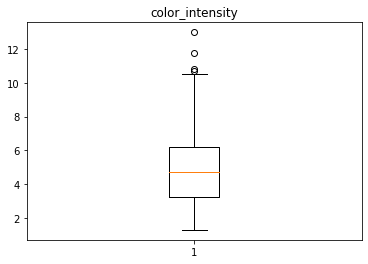

In [ ]:
# IQR 방식으로 이상치 탐색
# 데이터 가져오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})

# 상자그림 그리기
plt.boxplot(wine['color_intensity'], whis = 1.5)
plt.title('color_intensity')
plt.show()

In [ ]:
# 이상치의 위치와 값 확인하기
import numpy as np
def outliers_iqr(dt, col) : 
  quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
  iqr = quartile_3 - quartile_1
  lower_whis = quartile_1 - (iqr * 1.5)
  upper_whis = quartile_3 + (iqr * 1.5)
  outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
  return outliers[[col]]

outliers = outliers_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [ ]:
# 이상치 제거
drop_outliers = wine.drop(index = outliers.index)

# 이상치를 삭제하기 전과 후의 데이터 shape
print('Original :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

Original : (178, 14)
Drop outliers : (174, 14)


In [ ]:
# wine 데이터세트의 color_intensity의 이상치를 평균값으로 대체하기
# 이상치를 NaN으로 변경
wine.loc[outliers.index, 'color_intensity'] = np.NaN

# NaN이 된 이상치를 평균값으로 변경
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

### 범주형 변수 처리

In [1]:
# 데이터 불러오기
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [2]:
iris_dummy = pd.get_dummies(iris, columns = ['Class'])
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


### 데이터 분할

In [3]:
# 데이터 불러오기
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [13]:
# 데이터 분할하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns = ['Class']),
                                                    iris['Class'], test_size = 0.2, 
                                                    random_state = 1004)

# 크기 확인
print('X_train :', X_train.shape, 'X_test :', X_test.shape)
print('y_train :', y_train.shape, 'y_test :', y_test.shape)

X_train : (120, 4) X_test : (30, 4)
y_train : (120,) y_test : (30,)


In [6]:
X_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
87,6.3,2.3,4.4,1.3
67,5.8,2.7,4.1,1.0
131,7.9,3.8,6.4,2.0


In [7]:
y_train.head(3)

87     Versicolour
67     Versicolour
131      Virginica
Name: Class, dtype: object

In [8]:
iris['Class'].value_counts()

Setosa         50
Versicolour    50
Virginica      50
Name: Class, dtype: int64

In [9]:
y_train.value_counts()

Versicolour    41
Setosa         40
Virginica      39
Name: Class, dtype: int64

In [17]:
# 층화임의추출(stratify활용)
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns = 'Class'),
                                                    iris['Class'], test_size = 0.2,
                                                    stratify = iris['Class'])

In [18]:
# 크기 확인
print('X_train :', X_train.shape, '\tX_test :', X_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

X_train : (120, 4) 	X_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [20]:
y_train.value_counts()

Setosa         40
Virginica      40
Versicolour    40
Name: Class, dtype: int64

### 데이터 스케일링

In [23]:
# 1. standard scaler(표준화 방식)
# 최소값 최대값의 크기를 제한하지 않아 이상치에 매우 민감함
# 분류분석에 유용하다.
from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()

# train데이터의 fitting과 스케일링
StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)

# test데이터의 스케일링
X_test_sc = StdScaler.transform(X_test)

# 결과 확인
print('\t\t(min, max) (mean, std)')
print('Train_scaled (%.2f, %.2f) (%.2f, %.2f)'%(X_train_sc.min(),
                                                X_train_sc.max(),
                                                X_train_sc.mean(),
                                                X_train_sc.std()))
print('Test_scaled (%.2f, %.2f) (%.2f, %.2f)'%(X_test_sc.min(),
                                                X_test_sc.max(),
                                                X_test_sc.mean(),
                                                X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.35, 2.97) (-0.00, 1.00)
Test_scaled (-1.68, 2.08) (0.03, 0.90)
